# ML LAB 10 - 03 / 10 / 2020 | Sandhya M (1947139)


## Random Forest Classifier 

- Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
- It is a bagging technique and not a boosting technique. 
- The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.
- Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by voting.
- The diagram of the Random Forest is given as follows:

<img src = "rfs.PNG" height = "450" width ="450">



### Model Description:
- Implemented two Random Forest Classifier models to predict whether a person makes over 50K a year, one with 10 decision-trees and another one with 100 decision-trees. 
- The expected accuracy increases with number of decision-trees in the model. 
- Demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. 

### Dataset : "Income Evaluation" from UCI Repository

## Ensemble Learning
An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an Ensemble model.

<img src = "rfs2.PNG" height = "450" width ="450">

## Import Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import dataset 


In [2]:
data = 'income_evaluation.csv'

df = pd.read_csv(data)

##  Exploratory data analysis

###   View dimensions of dataset <a class="anchor" id="4.1"></a>

In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


We can see that there are 32561 instances and 15 attributes in the data set.

###  Preview the dataset 

In [4]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

### Rename column names 

We can see that the dataset does not have proper column names. The column names contain underscore. We should give proper names to the columns. 

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

###  View summary of dataset <a class="anchor" id="4.4"></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings

- We can see that the dataset contains 9 character variables and 6 numerical variables.

- `income` is the target variable.

###  5 - Point Summary

In [7]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

###  Check for missing values 

In [8]:
# check for missing values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

##  Explore Categorical Variables

###  Find categorical variables 

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


###  Preview categorical variables 

In [10]:
df[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

###  Summary of categorical variables 

- There are 9 categorical variables in the dataset.

- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.

- `income` is the target variable.

###  Frequency distribution of categorical variables 

In [11]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

### Percentage of frequency distribution of values

In [12]:
for var in categorical:
    
     print(df[var].value_counts()/np.float(len(df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

### Explore income target variable

In [13]:
# view the frequency distribution of values

df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

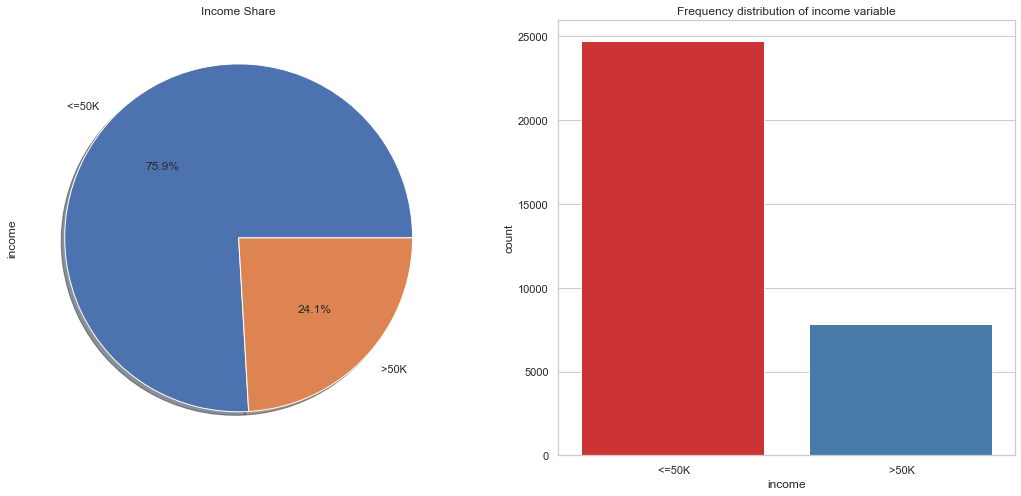

In [14]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

<AxesSubplot:>

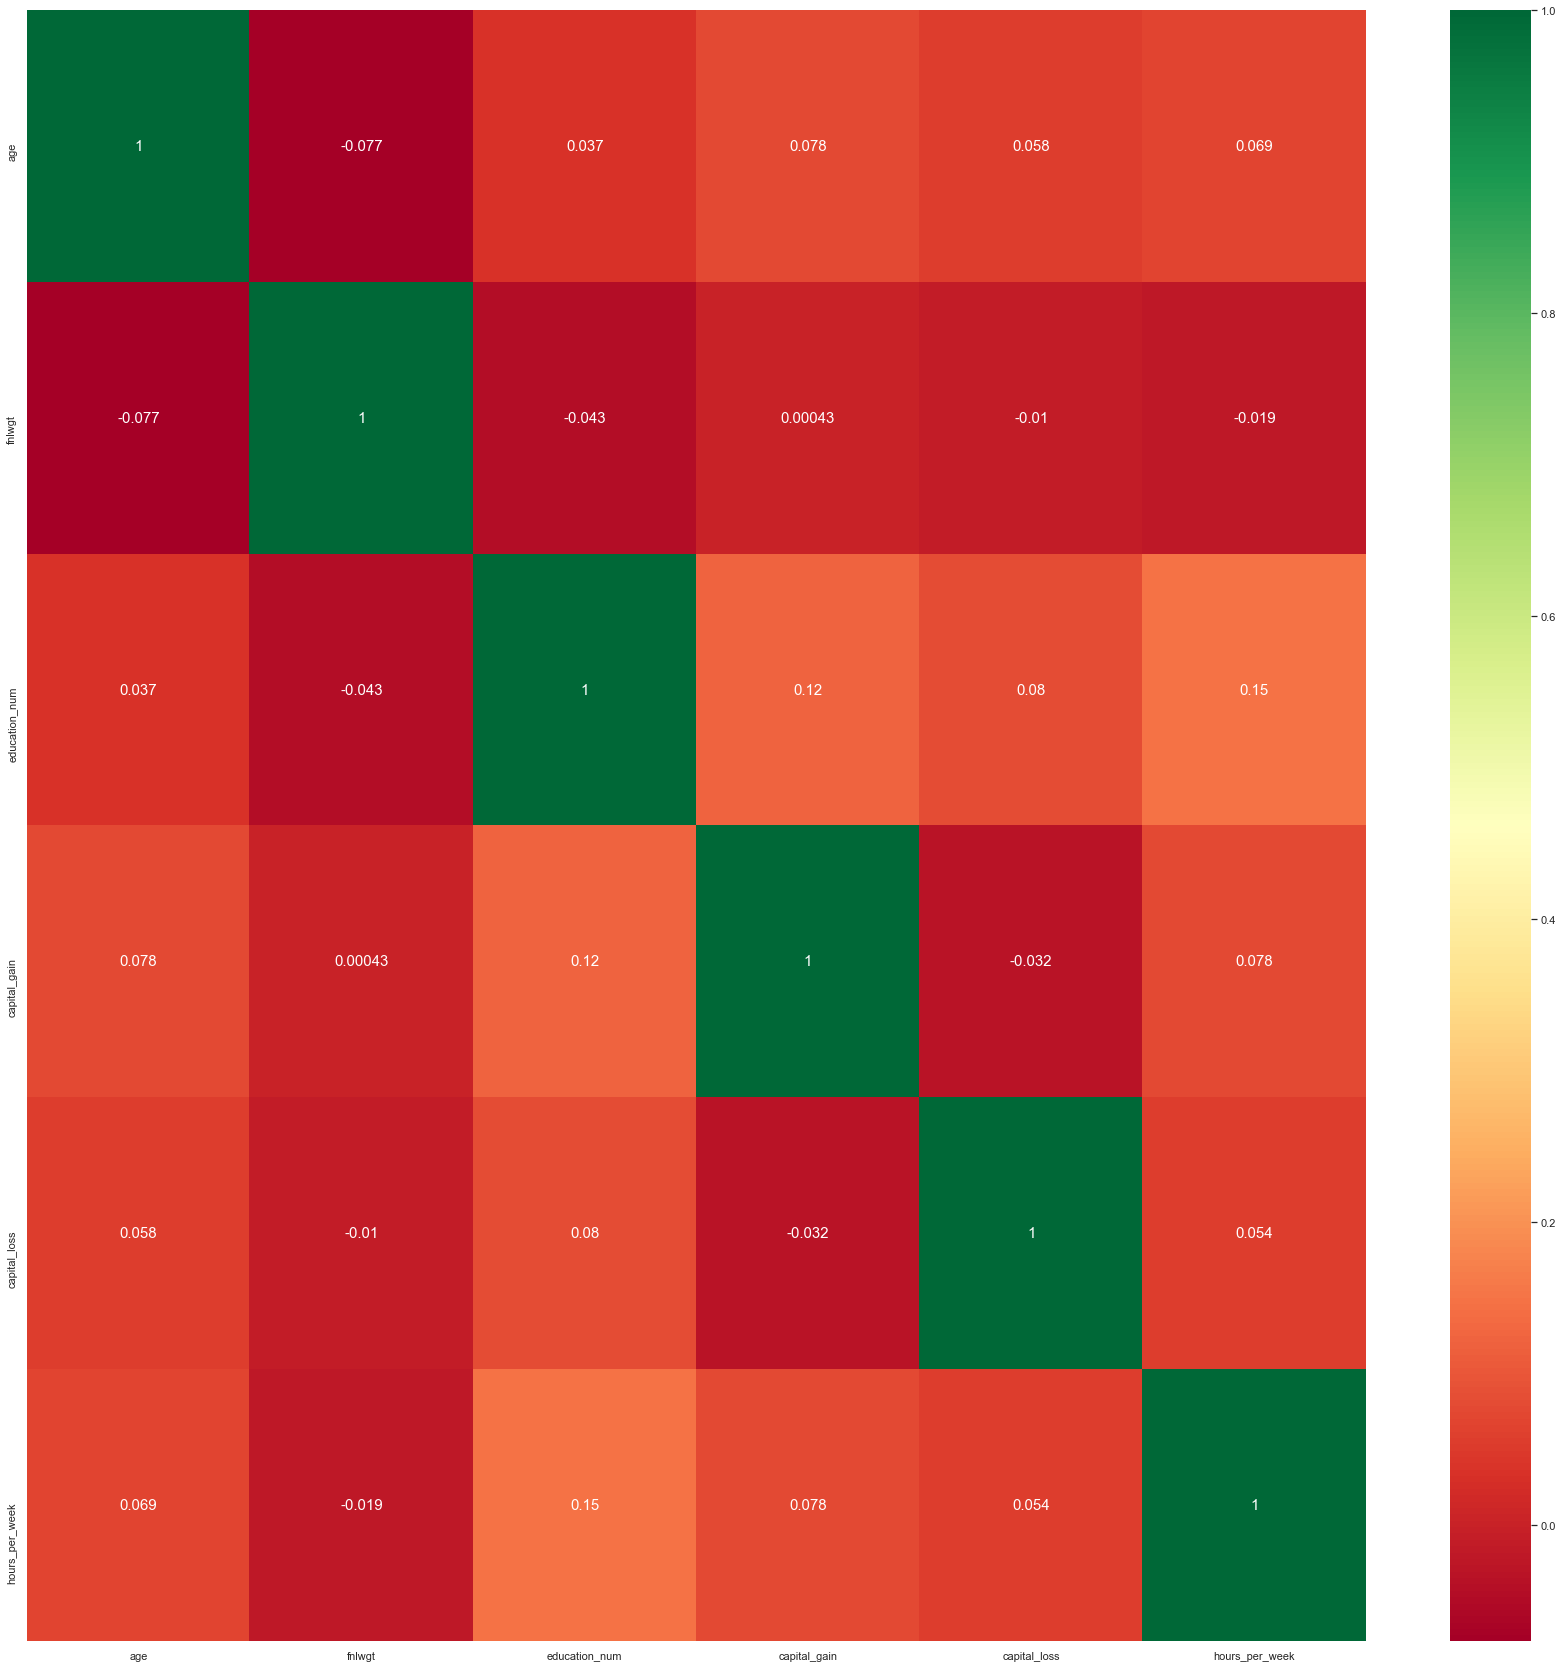

In [15]:
#Correlation Matrix

plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

#### Visualize `income` wrt `sex` variable

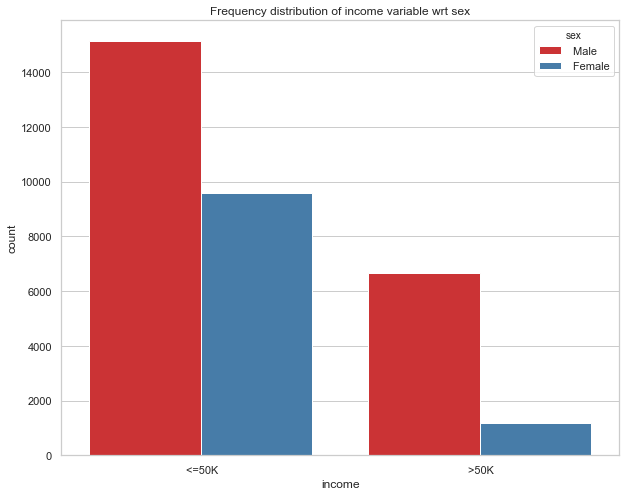

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

#### Interpretation


- We can see that males make more money than females in both the income categories.

#### Visualize `income` wrt `race`

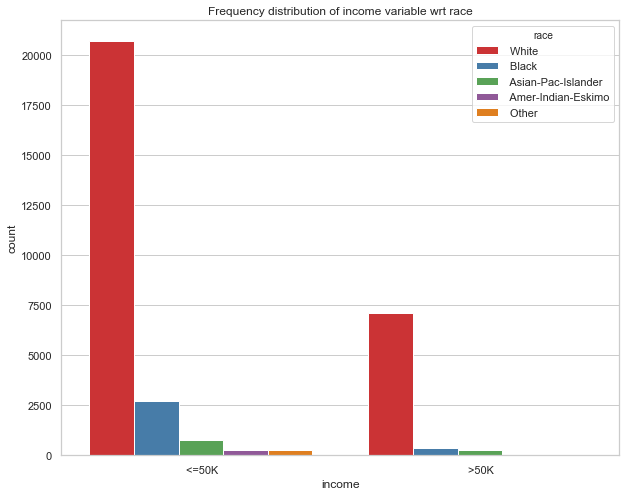

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

#### Interpretation


- We can see that whites make more money than non-whites in both the income categories.

#### Explore `workclass` variable

In [18]:
# check number of unique labels 

df.workclass.nunique()

9

In [19]:
# view the unique labels

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
# view frequency distribution of values

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. We can replace these `?` with `NaN`.

In [21]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace(' ?', np.NaN, inplace=True)

In [22]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

#### Visualize `workclass` variable

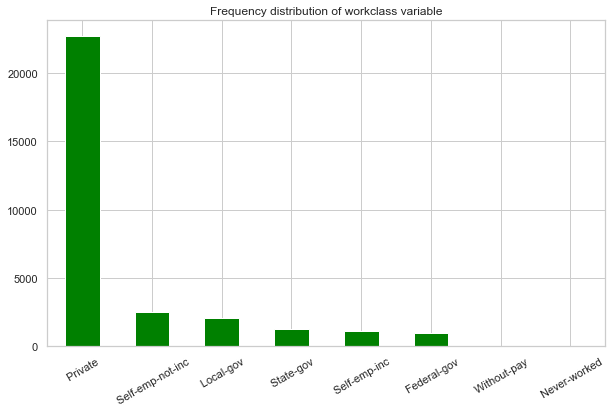

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

#### Interpretation


- We can see that there are lot more private workers than other category of workers.

### Number of labels: Cardinality 

- The number of labels within a categorical variable is known as **cardinality**. 

- A high number of labels within a variable is known as **high cardinality**. 

In [24]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

## Explore Numerical Variables

###  Find numerical variables 

In [25]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


###  Preview the numerical variables

In [26]:
df[numerical].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

### Summary of numerical variables

- There are 6 numerical variables.

- These are given by `age`, `fnlwgt`, `education_num`,`capital_gain`, `capital_loss` and `hours_per_week`.

- All of the numerical variables are of discrete data type.

### Check missing values in numerical variables 

In [27]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that there are no missing values in the numerical variables.

###  Explore numerical variables

#### Explore `age` variable

In [28]:
df['age'].nunique()

73

#### View the distribution of `age` variable

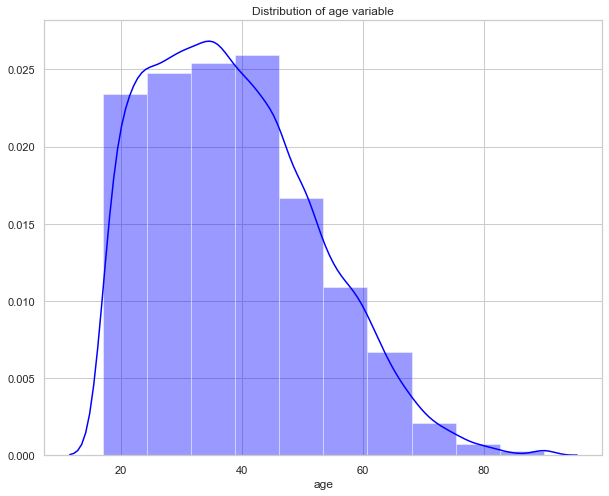

In [29]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

We can see that `age` is slightly positively skewed.

#### Detect outliers in `age` variable with boxplot

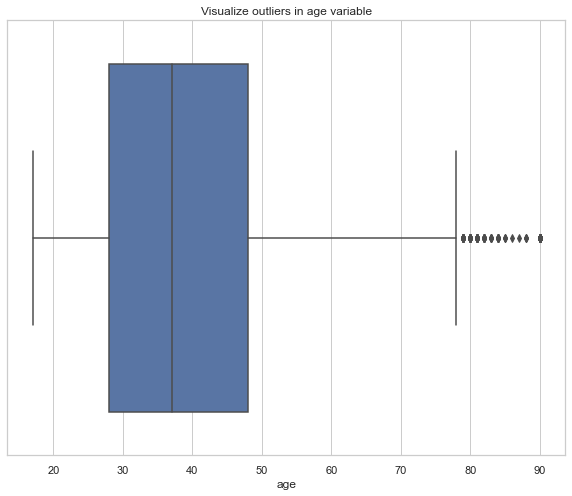

In [30]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in `age` variable.

#### Explore relationship between `age` and `income` variables

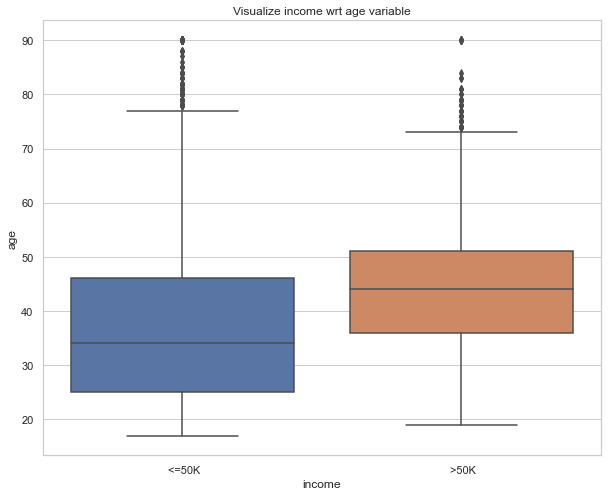

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#### Interpretation

- Younger people make less money as compared to senior people.

<Figure size 576x432 with 0 Axes>

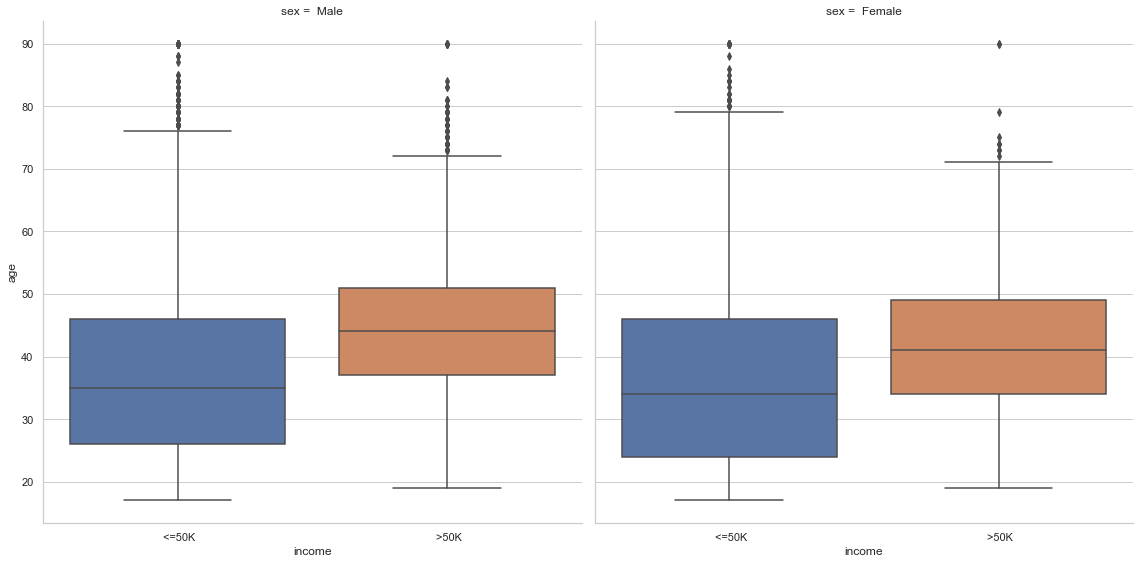

In [32]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

#### Find out the correlations

In [33]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#### Interpretation

- We can see that there is no strong correlation between variables.

#### Plot pairwise relationships in dataset

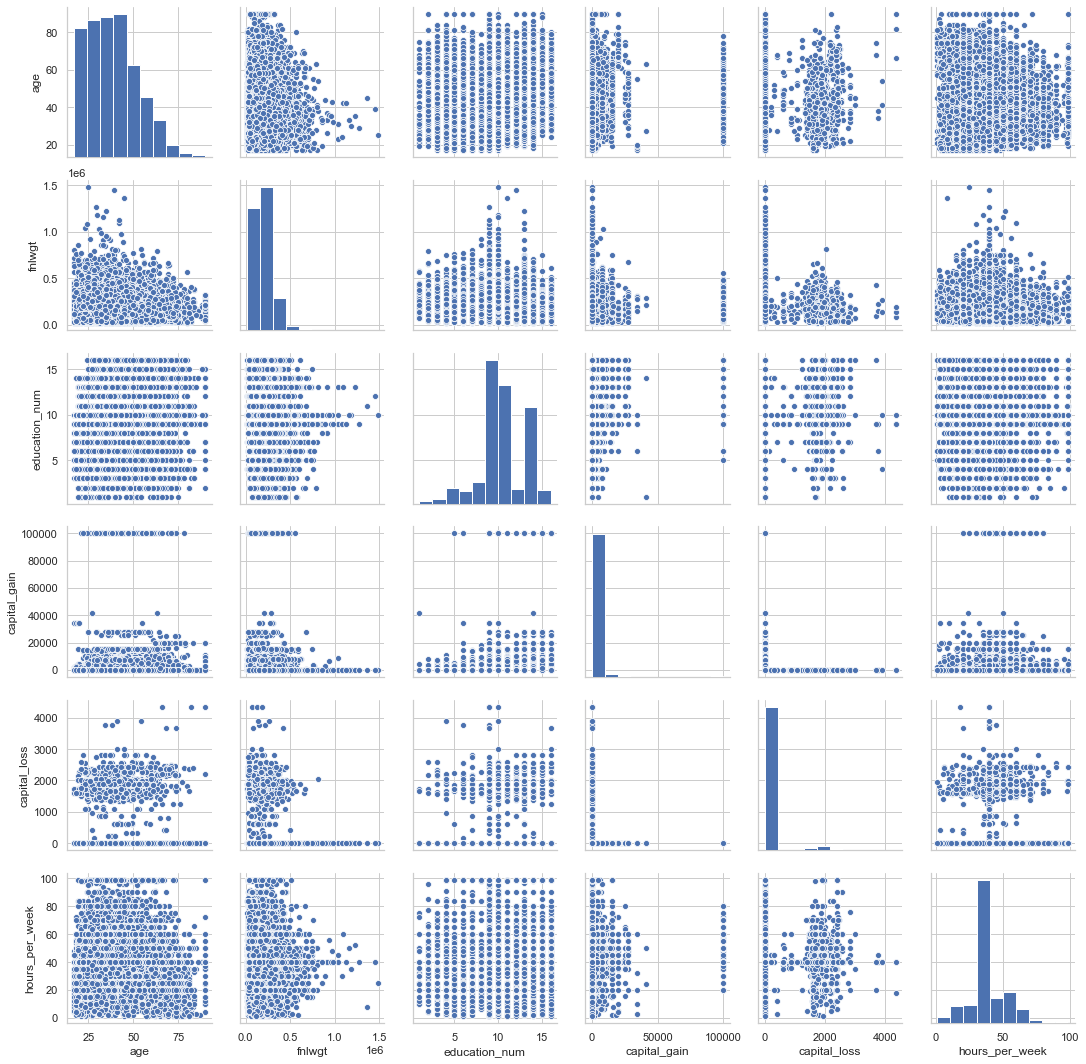

In [34]:
sns.pairplot(df)
plt.show()

#### Interpretation

- We can see that `age` and `fnlwgt` are positively skewed.

- The variable `education_num` is negatively skewed while `hours_per_week` is normally distributed.

- There exists weak positive correlation between `capital_gain` and `education_num` (correlation coefficient=0.1226). 

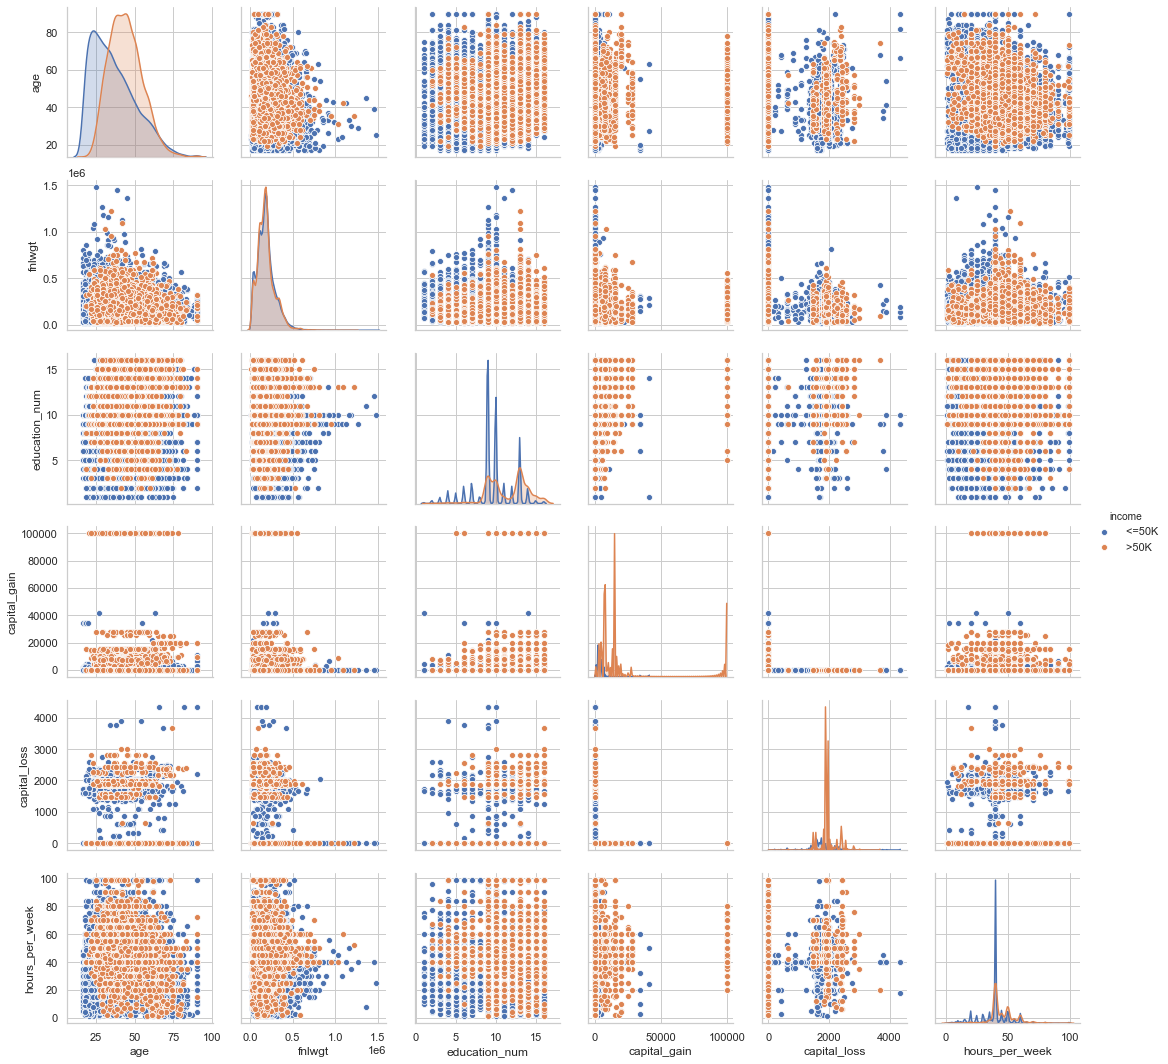

In [35]:
sns.pairplot(df, hue="income")
plt.show()

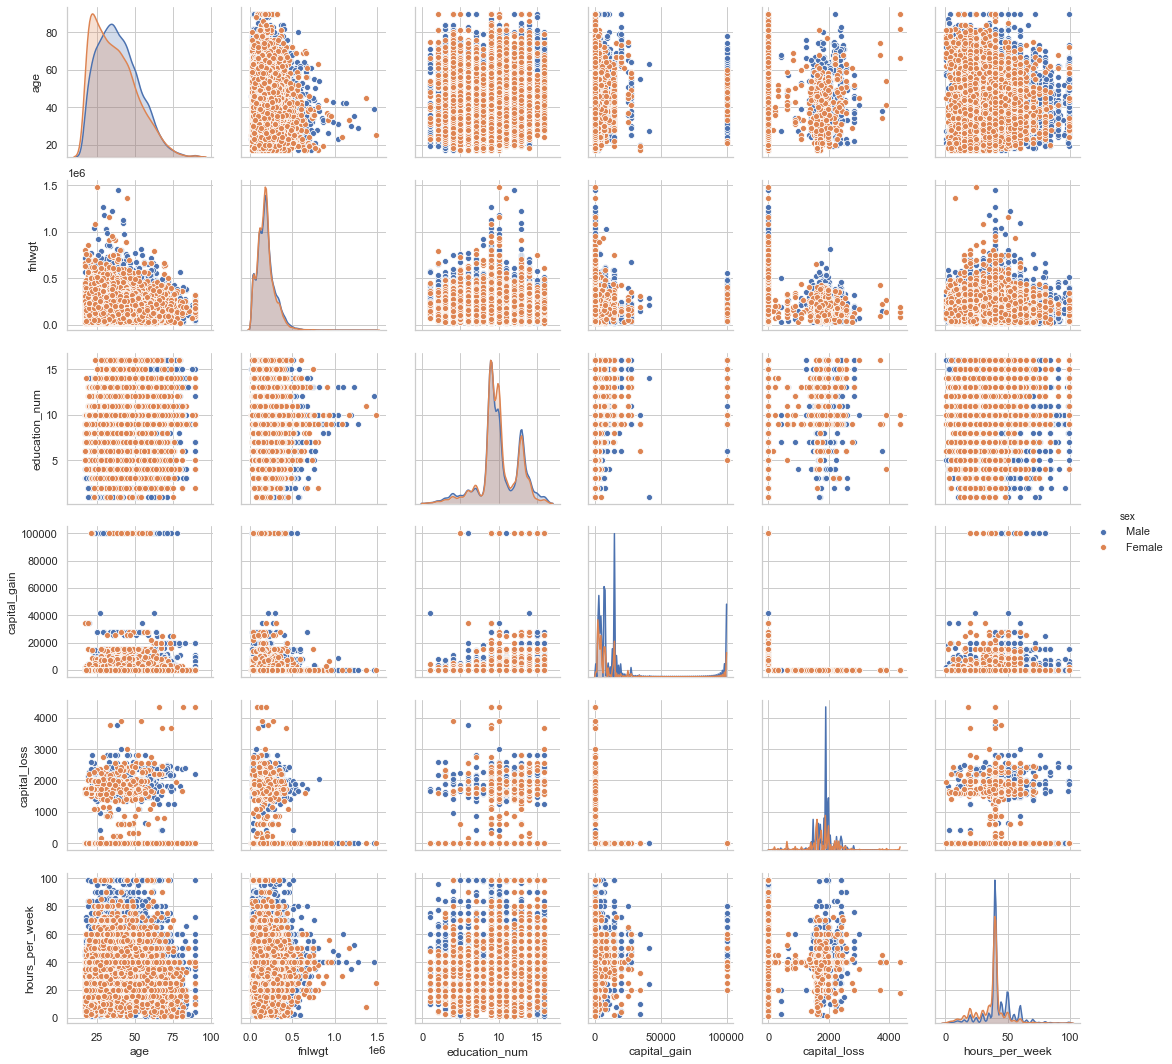

In [36]:
sns.pairplot(df, hue="sex")
plt.show()

## Declare feature vector and target variable

In [37]:
X = df.drop(['income'], axis=1)

y = df['income']

## Split data into separate training and test set - 70-30

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [39]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

##  Feature Engineering 


- **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. 

### Display categorical variables in training set


In [40]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### Display numerical variables in training set


In [41]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Missing values in categorical variables

In [42]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984


In [43]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)   

In [44]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [45]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [46]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

###  Encode categorical variables


In [47]:
# preview categorical variables in X_train

X_train[categorical].head()

workclass      education       marital_status     occupation  \
32098     Private        HS-grad   Married-civ-spouse   Craft-repair   
25206   State-gov        HS-grad             Divorced   Adm-clerical   
23491     Private   Some-college   Married-civ-spouse          Sales   
12367     Private        HS-grad        Never-married   Craft-repair   
7054      Private        7th-8th        Never-married   Craft-repair   

         relationship    race      sex  native_country  
32098         Husband   White     Male   United-States  
25206       Unmarried   White   Female   United-States  
23491         Husband   White     Male   United-States  
12367   Not-in-family   White     Male       Guatemala  
7054    Not-in-family   White     Male         Germany

In [48]:
!pip install category_encoders #transformers for encoding categorical variables into numeric
import category_encoders as ce

ERROR: Invalid requirement: '#transformers'


In [49]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [50]:
X_train.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
32098   45            1            0            0            0            0   
25206   47            0            1            0            0            0   
23491   48            1            0            0            0            0   
12367   29            1            0            0            0            0   
7054    23            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_33  \
32098            0            0            0  170871  ...                  0   
25206            0            0            0  108890  ...                  0   
23491            0            0            0  187505  ...                  0   
12367            0            0            0  145592  ...                  0   
7054             0            0            0  203003  ...                  0   

       native_country_34  native_country_35  native_country_36  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_37  native_country_38  native_country_39  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_40  native_country_41  native_country_42  
32098                  0                  0                  0  
25206                  0                  0                  0  
23491                  0                  0                  0  
12367                  0                  0                  0  
7054                   0                  0                  0  

[5 rows x 107 columns]

In [51]:
X_train.shape

(22792, 107)

We can see that from the initial 15 columns, we now have 107 columns in training set.

Similarly, take a look at the X_test set.

In [52]:
X_test.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
22278   27            1            0            0            0            0   
8950    27            1            0            0            0            0   
7838    25            1            0            0            0            0   
16505   46            1            0            0            0            0   
19140   45            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_33  \
22278            0            0            0  177119  ...                  0   
8950             0            0            0  216481  ...                  0   
7838             0            0            0  256263  ...                  0   
16505            0            0            0  147640  ...                  0   
19140            0            0            0  172822  ...                  0   

       native_country_34  native_country_35  native_country_36  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_37  native_country_38  native_country_39  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_40  native_country_41  native_country_42  
22278                  0                  0                  0  
8950                   0                  0                  0  
7838                   0                  0                  0  
16505                  0                  0                  0  
19140                  0                  0                  0  

[5 rows x 107 columns]

In [53]:
X_test.shape

(9769, 107)

* We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called **feature scaling**.

## Feature Scaling

In [54]:
cols = X_train.columns

In [55]:
from sklearn.preprocessing import RobustScaler #Scale features using statistics that are robust to outliers.
#Removes the median and scales the data according to the quantile range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [56]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [57]:
X_test = pd.DataFrame(X_test, columns=[cols])

We now have X_train dataset ready to be fed into the Random Forest classifier. We will do it as follows.

## Random Forest Classifier model with default parameters - 10 Decision Trees

In [73]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8431


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

## Random Forest Classifier model with 100 Decision Trees 

In [72]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8553


The model accuracy score with 10 decision-trees is 0.8431 but the same with 100 decision-trees is 0.8553. So, as expected accuracy increases with number of decision-trees in the model.

## Find important features with Random Forest model 

In [84]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [88]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt               0.157101
age                  0.148966
capital_gain         0.095149
hours_per_week       0.082740
marital_status_1     0.064259
                       ...   
native_country_27    0.000042
education_14         0.000040
native_country_17    0.000024
occupation_15        0.000015
workclass_8          0.000003
Length: 104, dtype: float64

We can see that the most important feature is `fnlwgt` and least important feature is `workclass_8`.

## Build the Random Forest model on selected features

In [89]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['workclass_8'], axis=1)

X_test = X_test.drop(['workclass_8'], axis=1)

Now, we will build the random forest model again and check accuracy.

In [92]:
# instantiate the classifier with n_estimators = 10

clf = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)

# Check accuracy score 

print('Model accuracy score with workclass_8 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with workclass_8 variable removed : 0.8471


In [91]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)

# Check accuracy score 

print('Model accuracy score with workclass_8 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with workclass_8 variable removed : 0.8556


#### Interpretation

- I have removed the `workclass_8` variable from the model, rebuild it and checked its accuracy. 

- The accuracy of the model now comes out to be 0.8556. 

- The accuracy of the model with all the variables taken into account is 0.8553. 

## Table display of all the accuracy values

| 10 Decision Trees | 100 Decision Trees | Removing WorkClass (10)  | Removing WorkClass (100) |
| :---    |    :----:   |  :----:   |  :----:   |      
| 0.8431  | 0.8553      | 0.8471 | 0.8556 |

## Confusion matrix 

In [93]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print('-------------------\n', cm)


Confusion Matrix

-------------------
 [[6889  518]
 [ 976 1386]]


<AxesSubplot:>

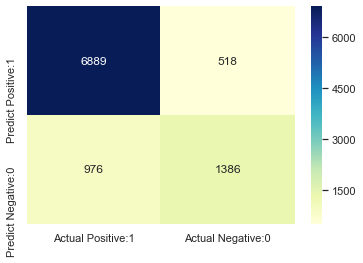

In [94]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report

In [95]:
from sklearn.metrics import classification_report

print('Classification Report for the Model')
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred))

Classification Report for the Model
----------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.59      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



##  Advantages and Disadvantages of Random Forest


#### Advantages:

1. It can come out with very high dimensional (features) data, and no need to reduce dimension, no need to make feature selection
2. It can judge the importance of the feature
3. Can judge the interaction between different features
4. Training speed is faster, easy to make parallel method
5. For unbalanced data sets, it balances the error.
6. If a large part of the features are lost, accuracy can still be maintained.

#### Disadvantages:

1. Random forests have been shown to fit over certain noisy classification or regression problems.
2. For data with different values, attributes with more values will have a greater impact on random forests, so the attribute weights generated by random forests on such data are not credible.

=================================================================================================SANDHYA M (1947139)